<a href="https://colab.research.google.com/github/RubenMcCarty/Machine-Learning-with-Python/blob/master/3_2_Ana%CC%81lisis_Regresio%CC%81n_No_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1><center>Análisis de regresión no lineal</center></h1>
## [Mg. Rubén Quispe](https://www.linkedin.com/in/ruben-quispe-l/)

Si los datos muestran una tendencia curvilínea, la regresión lineal no producirá resultados muy precisos en comparación con una regresión no lineal porque, como su nombre lo indica, la regresión lineal supone que los datos son lineales. Aprendamos sobre regresiones no lineales y apliquemos un ejemplo en Python. En este notebook, ajustamos un modelo no lineal a los puntos de datos que corresponden al PIB de China de 1960 a 2014.
# 1. Importando las librerías necesarias

In [ ]:
# tu codigo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


Aunque la regresión lineal es muy buena para resolver muchos problemas, no se puede utilizar para todos los conjuntos de datos. Primero, recuerde cómo la regresión lineal podría modelar un conjunto de datos. Modela una relación lineal entre una variable dependiente y y una variable independiente x. Tenía una ecuación simple, de grado 1, por ejemplo y = 2𝑥 + 3

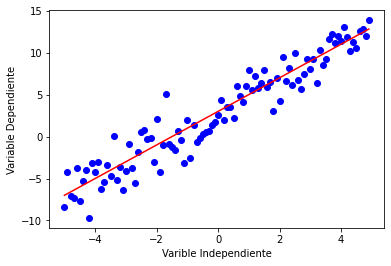

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
# y = 2x + 3
y = 2*(x)+3
y_noise = 2* np.random.normal(size = x.size)
ydata = y + y_noise
plt.plot(x, ydata, 'bo')
plt.plot (x,y, 'r')
plt.xlabel('Varible Independiente')
plt.ylabel('Variable Dependiente')
plt.show()

Las regresiones no lineales son una relación entre variables independientes 𝑥 y una variable dependiente 𝑦 que dan como resultado datos modelados de función no lineal. Básicamente, cualquier relación que no sea lineal puede denominarse no lineal y, por lo general, se representa mediante el polinomio de 𝑘 grados (potencia máxima de x).
$$ \ y = a x^3 + b x^2 + c x + d \$$

las funciones no lineales pueden tener elementos exponenciales, logaritmicas, fracciones y otros. Por ejemplo
$$ y = \log(x)$$

O incluso mas complicado como:
$$ y = \log(a x^3+ b x^2+ c x + d)$$

#### Echemos un vistaso a la grafica de funciones cubicas 

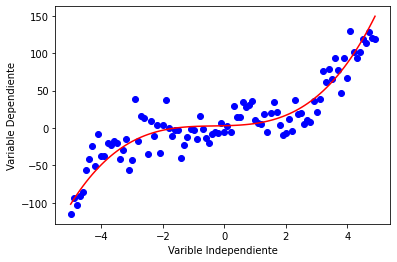

In [ ]:
x = np.arange(-5.0,5.0,0.1)
# y = x3 + x2 +x + 3
y = 1*(x**3)+1*(x**2)+1*x+3
y_noise = 20 *np.random.normal(size = x.size)
ydata = y + y_noise
plt.plot(x, ydata, 'bo')
plt.plot (x,y, 'r')
plt.xlabel('Varible Independiente')
plt.ylabel('Variable Dependiente')
plt.show()

Como puede ver, esta función tiene $ x^3$ y $𝑥^2$ como variables independientes. Además, el gráfico de esta función no es una línea recta sobre el plano 2D. Entonces esta es una función no lineal.

Algunos otros tipos de funciones no lineales son:
# Cuadratica
 $$ Y = X^2 $$

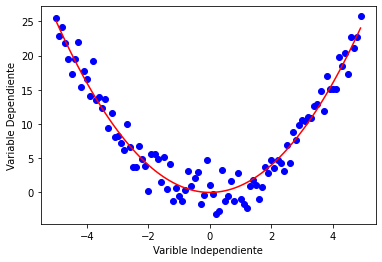

In [ ]:
x = np.arange(-5.0,5.0,0.1)
y = np.power(x,2)
y_noise = 2 *np.random.normal(size = x.size)
ydata = y + y_noise
plt.plot(x, ydata, 'bo')
plt.plot (x,y, 'r')
plt.xlabel('Varible Independiente')
plt.ylabel('Variable Dependiente')
plt.show()

# Exponencial
Una función exponencial con base c is definida por:
 $$ Y = a+b c^X $$
 
 Donde b ≠0, c > 0 , c ≠1, y x es cualquier número real. c,es la base es constante y el exponente x es variable

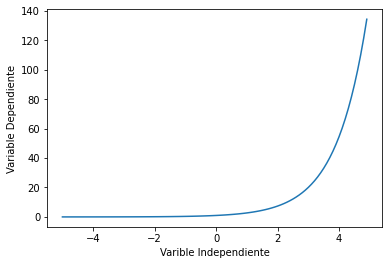

In [ ]:
x = np.arange(-5.0,5.0,0.1)

y = np.exp(x)

plt.plot (x,y)
plt.xlabel('Varible Independiente')
plt.ylabel('Variable Dependiente')
plt.show()

# Logaritmica
La respuesta 𝑦 es el resultado de aplicar un mapa logarítmico de la entrada 𝑥 a la variable de salida 𝑦. Es una de las formas más simples de __log ()__: es decir
$$ 𝑦 = log (𝑥)$$
 
Tenga en cuenta que en lugar de 𝑥, podemos usar 𝑋, que puede ser una representación polinomial de las 𝑥. En forma general, se escribiría como
$$ 𝑦 = log (𝑋)$$

<ipython-input-11-1212ea8921a7>:3: RuntimeWarning: invalid value encountered in log
  y = np.log(x)


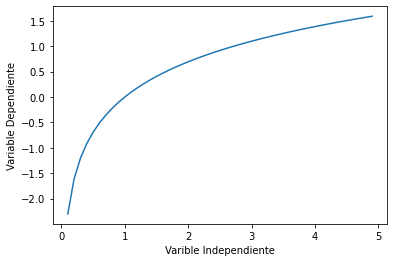

In [ ]:
x = np.arange(-5.0,5.0,0.1)

y = np.log(x)

plt.plot (x,y)
plt.xlabel('Varible Independiente')
plt.ylabel('Variable Dependiente')
plt.show()

# Sigmoidal Logistica 
 $$ Y = a + \frac{b}{1 + c^{(X-d)}}$$

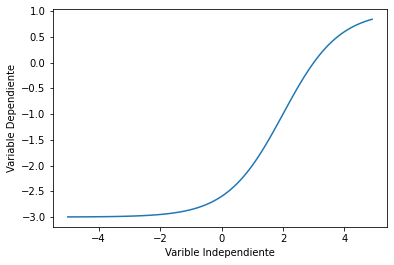

In [ ]:
# funcion de activación sigmoide
x = np.arange(-5.0,5.0,0.1)
#y = 1-4/1+e(x-2)
y = 1-4/(1+np.power(3, x-2))

plt.plot (x,y)
plt.xlabel('Varible Independiente')
plt.ylabel('Variable Dependiente')
plt.show()

# Ejemplo de regresión no lineal
Por ejemplo, intentaremos ajustar un modelo no lineal a los puntos de datos correspondientes al PIB de China de 1960 a 2014. Descargamos un conjunto de datos con dos columnas, la primera, un año entre 1960 y 2014, la segunda, Ingreso interno bruto anual correspondiente de China en dólares estadounidenses para ese año.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
pwd

'/Users/rubencarthy/Documents/BIC/Especialización analítica Data Science con Python/Module 3/Labs'

In [ ]:
df = pd.read_csv("china_gdp.csv")
df.head(20)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


In [ ]:
# los 10 ultimos filas
df.tail(10)

,Year,Value
45,2005,2.268599e+12
46,2006,2.729784e+12
47,2007,3.523094e+12
48,2008,4.558431e+12
49,2009,5.059420e+12
50,2010,6.039659e+12
51,2011,7.492432e+12
52,2012,8.461623e+12
53,2013,9.490603e+12
54,2014,1.035483e+13


In [ ]:
df.isnull().sum() # no tenemos valores perdidos

Year     0
Value    0
dtype: int64

In [ ]:
df.shape

(55, 2)

In [ ]:
# datos estadisticos # nota discribe solo nos imprime datos numericos
df.describe()

,Year,Value
count,55.00000,5.500000e+01
mean,1987.00000,1.437042e+12
std,16.02082,2.500085e+12
min,1960.00000,4.668518e+10
25%,1973.50000,1.395123e+11
50%,1987.00000,3.074796e+11
75%,2000.50000,1.268748e+12
max,2014.00000,1.035483e+13


# Plotting the Dataset
Así es como se ven los puntos de datos. Parece una función logística o exponencial. El crecimiento comienza lento, luego desde 2005 en adelante, el crecimiento es muy significativo. Y finalmente, se desaceleró levemente en la década de 2010.

<function matplotlib.pyplot.show(close=None, block=None)>

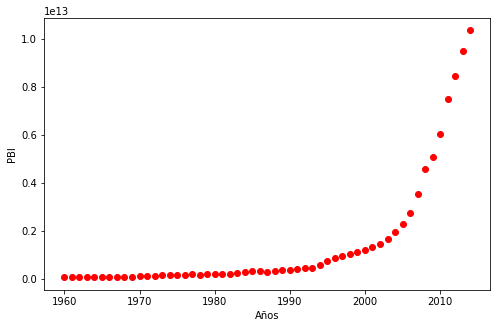

In [ ]:
# tu codigo
plt.figure (figsize=(8,5))
x_data, y_data = (df['Year'].values, df['Value'].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('PBI')
plt.xlabel('Años')
plt.show

# Elegir un modelo
A partir de una mirada inicial a la gráfica, determinamos que la función logística podría ser una buena aproximación, ya que tiene la propiedad de comenzar con un crecimiento lento, aumentar el crecimiento en el medio y luego volver a disminuir al final; como se ilustra a continuación:

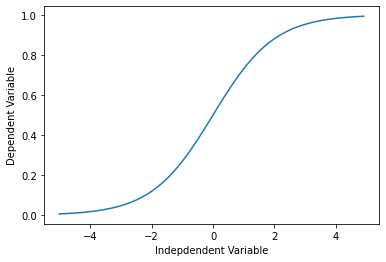

In [ ]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0/(1.0+np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

La fórmula de la función logística es la siguiente:
$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Controls the curve's steepness,

$\beta_2$: Slides the curve on the x-axis.
 # Construyendo el modelo
 Construyendo el modelo de regresión e inicialicemos sus parámetros.

In [ ]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1/ (1+np.exp(-Beta_1*(x-Beta_2)))
     return y

Veamos una línea sigmoidea de muestra que podría encajar con los datos:

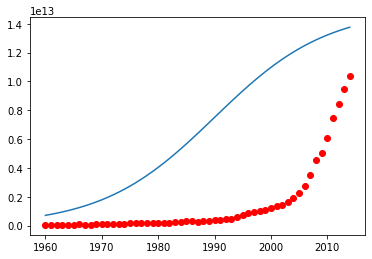

In [ ]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1, beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

Nuestra tarea aquí es encontrar los mejores parámetros para nuestro modelo. Primero normalicemos nuestra xey:

In [ ]:
# Lets normalize our data
xdata = x_data/max(x_data)
ydata =y_data/max(y_data)

# ¿Cómo encontramos los mejores parámetros para nuestra línea de ajuste?

podemos usar **curve_fit**, que usa mínimos cuadrados no lineales para ajustar nuestra función sigmoidea a los datos. Valores óptimos para los parámetros de modo que la suma de los residuos al cuadrado de sigmoide (xdata, * popt) - ydata se minimice.

Son nuestros parámetros optimizados.

In [ ]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.453018, beta_2 = 0.997207


Ahora trazamos nuestro modelo de regresión resultante.

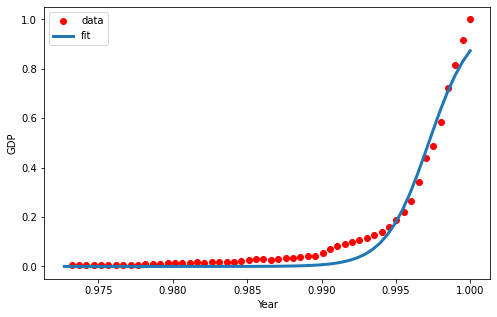

In [ ]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

# Práctica 
¿Puedes calcular cuál es la precisión de nuestro modelo?

In [ ]:
# write your code here

# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.93


# Gracias 